# PREDICTION OF HEART DISEASE

# Project Plan

## The Data 

Description of data to be used:
The dataset we utilized for our analysis is obtained from Kaggle (http://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data). The Dataset is of high quality having no null values, special characters, duplicate entries or missing values, this eliminates the potential for data cleaning. Thus, high-quality data ensures robustness for data analysis and modeling. This dataset emphasizes twelve features that can be used to predict a possible heart disease:
(1) Age = Refers to the patient's age.
(2) Sex = Refers to the patient's gender.
(3) ChestPainType = Refers to the type of chest pain the patients have (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
(4) RestingBP = Refers to the patient's blood pressure levels in a resting state.
(5) Cholesterol = Refers to the cholesterol level.
(6) FastingBS = Refers to the blood sugar level after a patient has fasted for a certain period (1: if FastingBS > 120 mg/dl, 0: otherwise).
(7) RestingECG = Refers to the state of the electronic activity of the heart as Normal and ST.
(8) Maximum Heart Rate = Refers to the patient's maximum heart rate (Numerical value between 60 and 202).
(9) ExerciseAngina = This represents patients induced with angina who do and do not exercise.
(10) Old peak = Refers to the ST numerical Value measured in depression.
(11) ST_slope = Refers to the slop of the ST segment on an ECG (Up: upsloping, Flat: flat, Down: downsloping).
(12) Heart Disease = Refers to the presence and absence of heart disease (1: Heart disease, 0: Normal).
To explore and work on complex patterns and to understand the relationship between the features in the dataset, diverse variables such as demographic details, clinical metrics and ECG features are essential for analyzing heart disease risk. This Dataset encompasses both numerical and categorical variables which provides a broad spectrum of possibilities for analysis. Additionally, this dataset was combined from 5 individual heart datasets over 12 common attributes. The final dataset consists of 918 observations out of 1190 observed records removing 272 duplicate observations.


## Project Aim and Objectives 

The aim of this project is to comprehensively analyse and understand factors influencing heart disease, utilizing a multifaceted approach encompassing feature importance analysis, correlation analysis, patient stratification, and predictive modelling. The primary goal is to unravel the key factors influencing heart disease risk. This begins with meticulous preprocessing of the dataset, strategically converting categorical variables into numeric format through label encoding. The subsequent application of a Decision Tree Classifier provides a nuanced understanding of feature importance. Feature importance scores are not only extracted but are also vividly visualized through a Decision Tree structure and an insightful bar chart. This dual visualization approach aims to offer a clear, intuitive overview of the features that play the most significant roles in predicting heart disease risk. The project shifts focus to exploring the intricate relationships between various features and the target variable, 'HeartDisease.' Through rigorous calculations of correlation coefficients and subsequent sorting, a visual representation in the form of a correlation matrix is crafted. The analysis goes a step further by conducting statistical significance testing, particularly for the correlation between 'ExerciseAngina' and 'HeartDisease.' This holistic approach aims to provide not only quantitative insights but also a robust assessment of the strength and reliability of identified relationships. Then it aims to dissect the prevalence of heart disease across diverse patient demographics, specifically age, gender, and exercise-induced angina. Through meticulous age and gender stratification, the project generates count summaries, visually encapsulating the distribution of heart disease within different categories. The additional layer of stratification based on exercise-induced angina introduces further granularity, shedding light on its distinct impact on heart disease within specific patient groups. Then the objective revolves around predicting high fasting blood sugar based on a subset of heart-related features. The project undertakes rigorous preprocessing, excluding categorical variables and focusing solely on numerical features. The implementation of a Random Forest Classifier seeks to establish a robust predictive model. The subsequent evaluation of the model's accuracy, coupled with visualizations of decision trees within the Random Forest, aims to unravel the complex ensemble-driven decision-making process and gauge the model's efficacy in predicting high fasting blood sugar. Finally, calculating accuracy, precision, F1 score and roc curve for distinct ml algorithms and performing comparative analysis results in providing the best model for predicting heart disease.

### Specific Objective(s)

* __Objective 1:__ Feature Importance Analysis
* __Objective 2:__ Correlation Analysis
* __Objective 3:__ Patient Stratification
* __Objective 4:__ Accuracy Evaluation using Random Forest Model
* __Objective 5:__ Comparative Analysis of non-linear ML algorithms

## System Design (5 marks)

### Architecture

To give a diagrammatic representation of the data set and its various level of processing and utilization, System Architecture is used. The initial stage begins with data gathering, where the dataset is collected from Kaggle website in .csv format (flat file). Once acquired, the dataset enters a preprocessing level, where it undergoes three level of processing. Firstly, by converting categorical values to numerical values, secondly considering only numerical values and dropping categorical values and thirdly considering both categorical and numerical values. Following analysis, the dataset transitions to the modeling level, where machine learning algorithms are trained and fine-tuned to make predictions or classifications. Regular graph and Correlation matrix without machine learning algorithms is also used to do some predictions. As a treat visualizing of predicted data comes into picture showcasing Decision tree, Correlation matrix, regular graph, random forest model, comparative analysis between random forest model, decision tree, gradient boosting.  

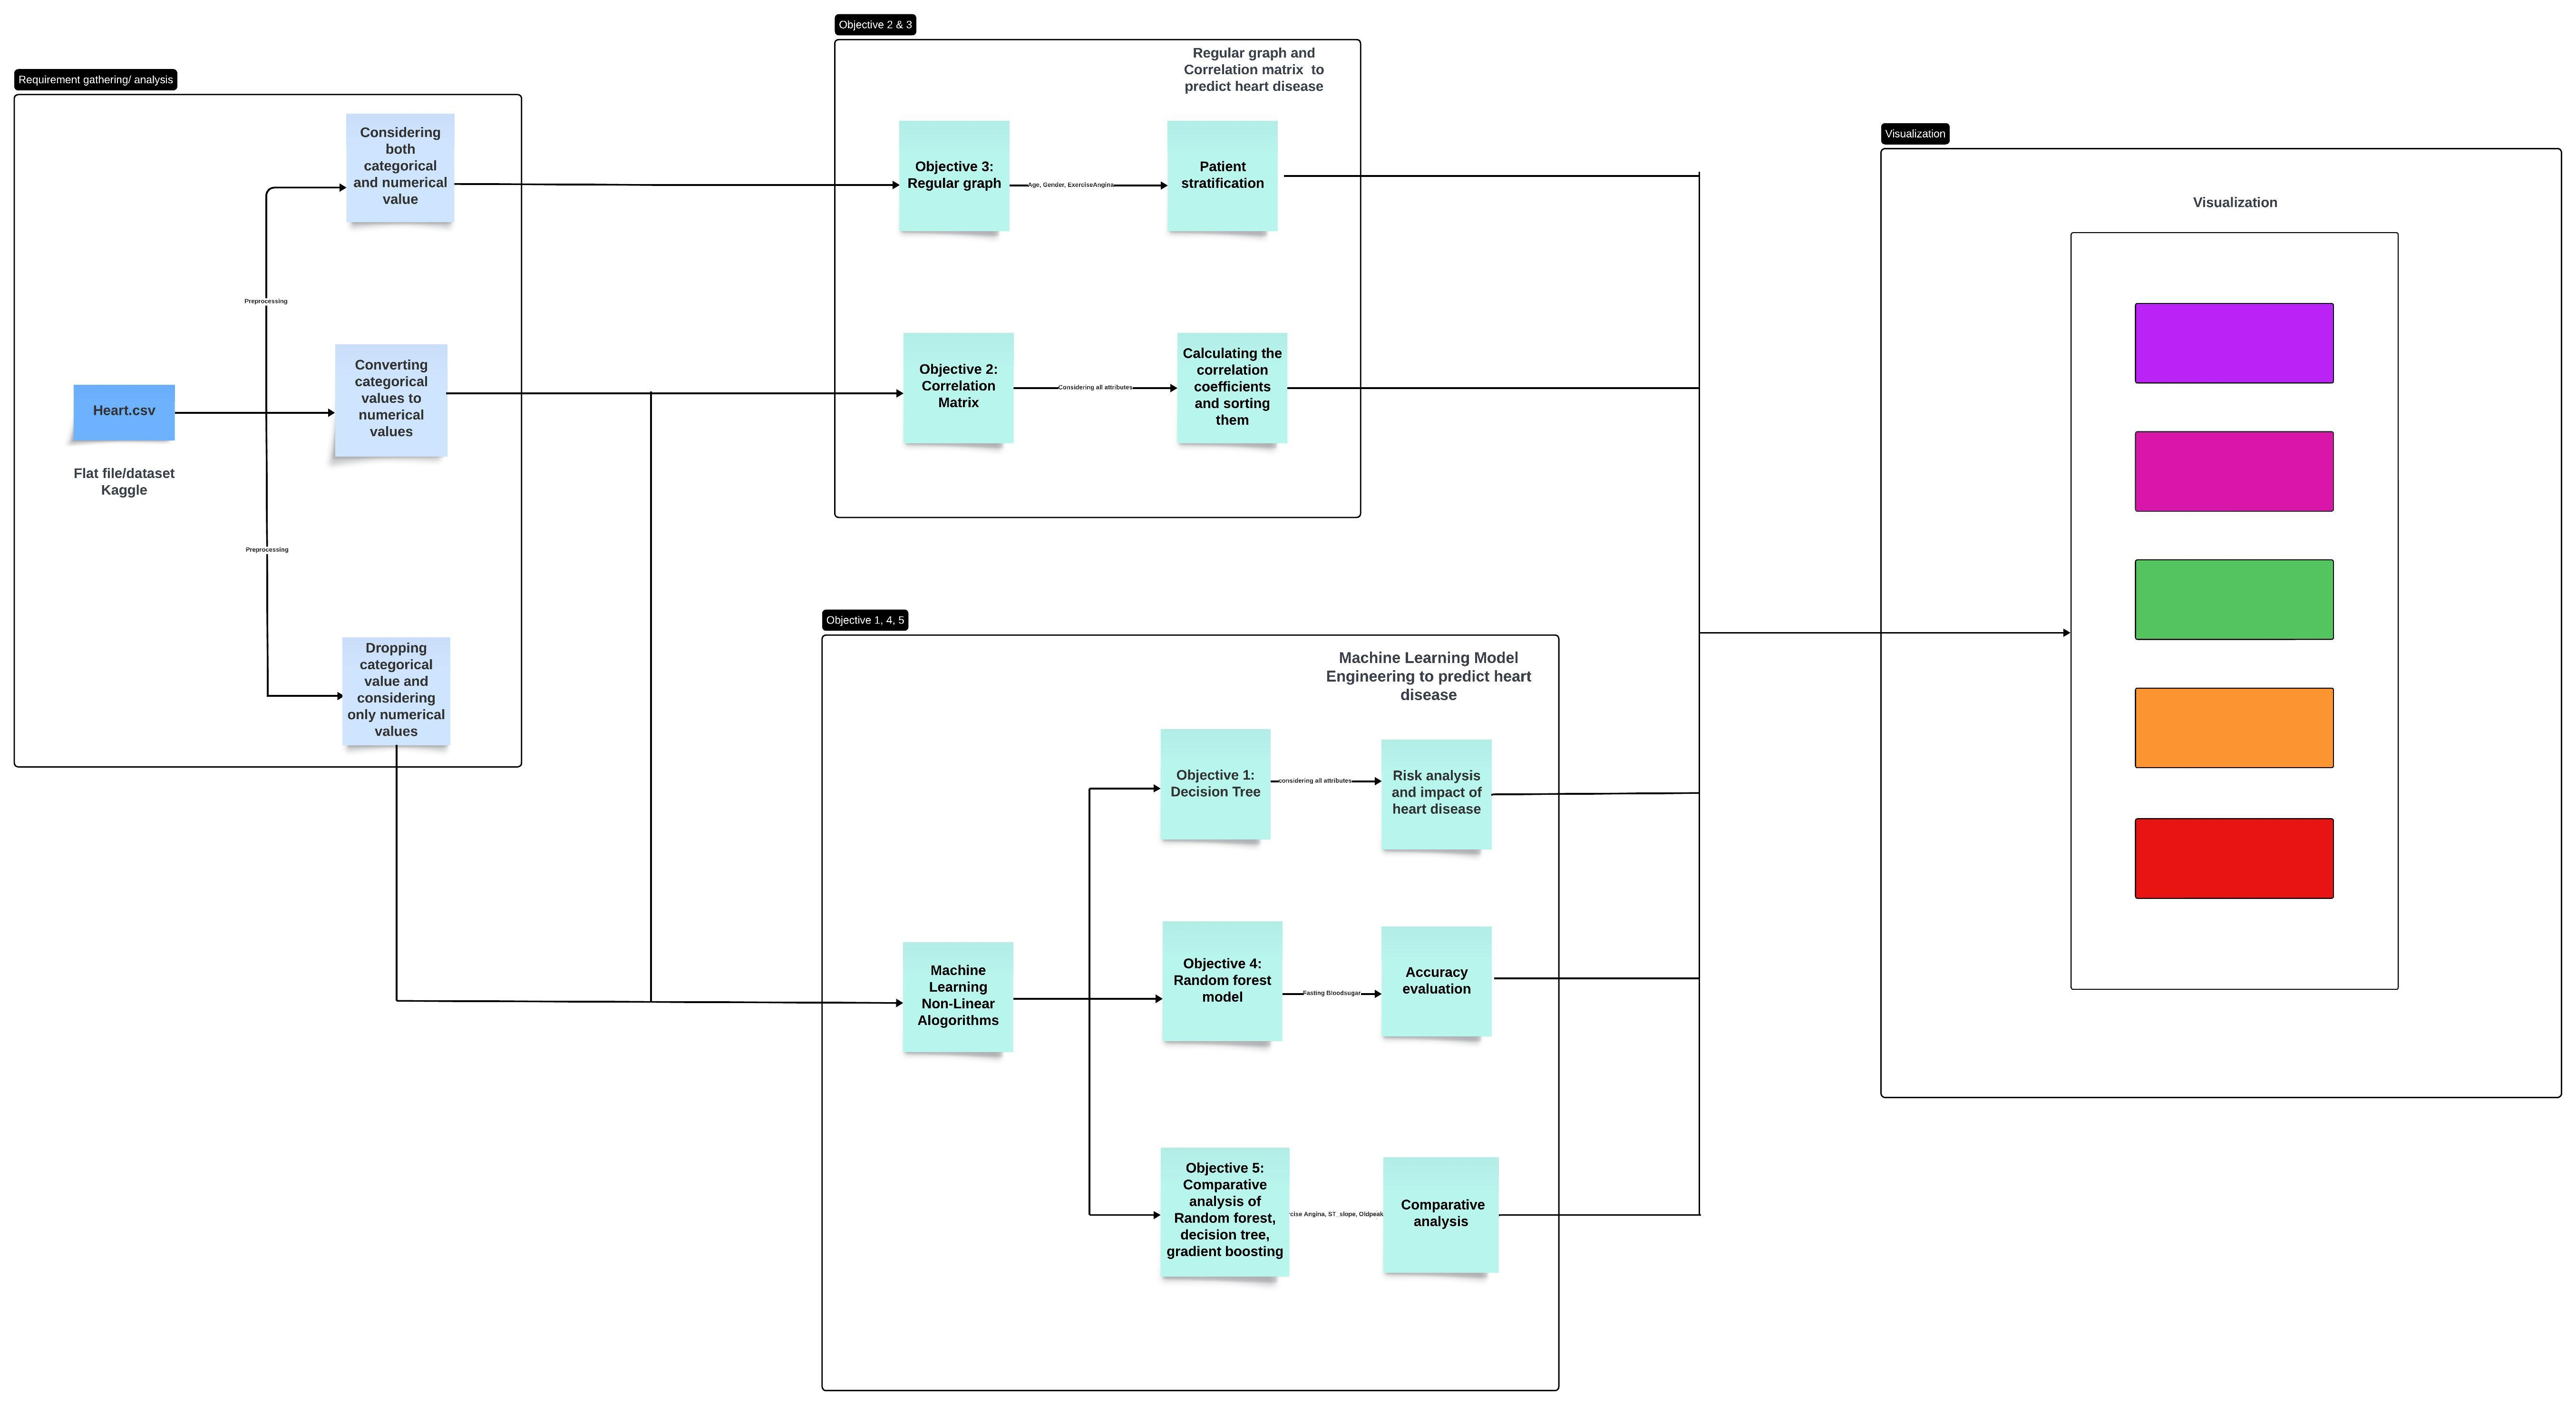


  
### Processing Modules and Algorithms

Below are the alogrithms and processing modules used:
* Preprocessing the data set.
* Implementing machine learning algorithms.
* Converting data set to predict the heart disease using Decision tree, correlation matrix.
* People Stratification to visualize the derived data based on few columns.
* Finding the accuracy of data set with one column using Random Forest model.
* Doing comparative analysis between different machine learning models.


# Program Code 

In [1]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import pearsonr
heart_df = pandas.read_csv("heart.csv")   

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
def threshold_data(data):
    age_threshold = 50
    cholesterol_threshold = 190
    data['AtRisk'] = (data['Age'] > age_threshold) & (data['Cholesterol'] > cholesterol_threshold)
    print("Dataframe with new column")
    print(data.head())

In [4]:
threshold_data(heart_df)

Dataframe with new column
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  AtRisk  
0              N      0.0       Up             0   False  
1              N      1.0     Flat             1   False  
2              N      0.0       Up             0   False  
3              Y      1.5     Flat             1   False  
4              N      0.0       Up             0    True  


In [5]:
def preprocess_data(data):
    #seperating numerical and categorical values into different variables
    numerical = data.select_dtypes(include=['number']).columns
    categorical = data.select_dtypes(exclude=['number']).columns
    #converting categorical data with label encoder
    label_encoder = LabelEncoder()
    data[categorical] = data[categorical].apply(lambda c: label_encoder.fit_transform(c) if c.name in categorical else c)
    return data

In [6]:
#Objective 1 : Feature Importance Analysis
def risk_factor_analysis(data):
    data_numeric =preprocess_data(data)
    #drop data with nan in numerical columns
    data_numeric = data_numeric.dropna(subset=['HeartDisease'])
    #passing all other features are X, target column heart diesase is y
    X = data_numeric.drop('HeartDisease', axis=1)
    y = data_numeric['HeartDisease']
    #check for non zero values
    if len(data_numeric) > 0:
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X, y)
        #calculate feature importance
        feature_importances = pandas.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        print("Feature Importances:")
        print(feature_importances)
    else:
        print("Insufficient samples")
risk_factor_analysis(heart_df)

Feature Importances:
           Feature  Importance
10        ST_Slope    0.396306
4      Cholesterol    0.118856
7            MaxHR    0.109450
2    ChestPainType    0.071535
9          Oldpeak    0.067638
3        RestingBP    0.065814
0              Age    0.056879
1              Sex    0.038201
5        FastingBS    0.027506
8   ExerciseAngina    0.025193
6       RestingECG    0.021153
11          AtRisk    0.001469


In [7]:
#Objective 2 : Correlation Analysis
def correlation_analysis(data):
    #correlate all features in dataset with corr() method
    correlation_matrix = data.corr()
    target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
    print("Feature Selection Based on Correlation Analysis:")
    #based on the result of correlation analysis, checking feature with high correlation value
    exercise_angina = data['ExerciseAngina']
    heart_disease = data['HeartDisease']
    #convert ExerciseAngina into numerical values
    exercise_numeric = pandas.to_numeric(exercise_angina, errors='coerce')
    #finding correlation coefficient with a p-value to check if correlation is meaningful 
    correlation_coefficient, p_value = pearsonr(exercise_numeric.dropna(), heart_disease.dropna())
    print(f"\nCorrelation Coefficient: {correlation_coefficient}")
    print(f"\nP-value: {p_value}")
    if p_value < 0.05:
        print("\nCorrelation is statistically significant.")
    else:
        print("Correlation is not statistically significant.")
correlation_analysis(heart_df)

Feature Selection Based on Correlation Analysis:

Correlation Coefficient: 0.49428199182426846

P-value: 1.0130182683916914e-57

Correlation is statistically significant.


In [8]:
#Objective 3 : Patient stratification by Age , Gender and Exercise
import pandas as pd
df = pd.read_csv('heart.csv')

# Age stratification;
#seperating ages into ranges
age_bins = [25,30,40,50,60,80,float('inf')]
age_labels = ['25-30','31-40','41-50','51-60','61-80','80+']
df['Patients_Age'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels, right = False)
#group age with respect to target variable (HeartDisease)
HDisease_count_Age = df.groupby(['Patients_Age', 'HeartDisease'], observed=False).size().unstack(fill_value=0)
print(HDisease_count_Age)

# Gender stratification
gender_labels = ['F','M']
df['Patients_Gender'] = df['Sex'].replace({0: 'M', 1: 'F'})
#group gender with respect to target variable (HeartDisease)
HDisease_count_gender = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)
print(HDisease_count_gender)

# Exercise stratificarion;
exercise_labels = ['N','Y']
df['Patients_Exercise'] = df['ExerciseAngina'].replace({0:'N', 1:'Y'})
#group ExerciseAngina with respect to target variable (HeartDisease)
HDisease_count_exercise = HDisease_count_gender = df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack(fill_value=0)
#creating variables according to different criteria provided by the column
exercise_yes_HD_no = HDisease_count_exercise.loc['Y', 0]
exercise_no_HD_no = HDisease_count_exercise.loc['N',0]
exercise_yes_HD_yes = HDisease_count_exercise.loc['Y',1]
exercise_no_HD_yes = HDisease_count_exercise.loc['N',1]
print("Count of individuals who exercise and don't have heart disease:", exercise_yes_HD_no)
print("Count of individuals who don't exercise and don't have heart disease:", exercise_no_HD_no)
print("Count of individuals who exercise and have heart disease:",exercise_yes_HD_yes)
print("Count of individuals who don't exercise and have heart disease:",exercise_no_HD_yes)

HeartDisease    0    1
Patients_Age          
25-30           4    0
31-40          50   26
41-50         126   85
51-60         162  212
61-80          68  185
80+             0    0
HeartDisease    0    1
Sex                   
F             143   50
M             267  458
Count of individuals who exercise and don't have heart disease: 55
Count of individuals who don't exercise and don't have heart disease: 355
Count of individuals who exercise and have heart disease: 316
Count of individuals who don't exercise and have heart disease: 192


In [9]:
#Objective 4 : Accuracy Evaluation using Random Forest Model
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#droping all columns which has string values 
df = pd.read_csv('heart.csv')
columns_to_drop = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = df.drop(columns=columns_to_drop)
#passing feature FastingBP as X and y
X = df.drop('FastingBS', axis=1)
y = df['FastingBS']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_acc = RandomForestClassifier()
rf_acc.fit(X_train, y_train)
#finding prediction and accuracy
y_pred = rf_acc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7445652173913043


In [10]:
#Objective 5 : Comparative Analysis between non-linear ML Models
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns 
data = pd.read_csv('heart.csv')
#using label encoder to convert categorical values to numerical values
le = LabelEncoder()
data['categorical_column1_encoded'] = le.fit_transform(data['ExerciseAngina'])
data['categorical_column2_encoded'] = le.fit_transform(data['ST_Slope'])
#comparing 3 columns
compared_columns = ['categorical_column1_encoded','categorical_column2_encoded','Oldpeak'] 
#set the x (columns compared)and y(heart disease -target)
x = data[compared_columns]
y = data['HeartDisease'] 
#splitting the data set into the training set and test set 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42) 

In [11]:
#Decision Tree Classifier 
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train) 
#finding prediction and accuracy
y_prediction_1=dt.predict(x_test)
print("Accuracy:")
accuracy_score(y_test,y_prediction_1) 
#prediction using confusion matrix based on prediction_1
conf_matrix = confusion_matrix(y_test, y_prediction_1)
#prediction using precision score based on prediction_1
precision = precision_score(y_test, y_prediction_1)   
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision Score:", precision)
classification_report= classification_report(y_test, y_prediction_1) 
print("\nClassification Report:")
print(classification_report)

Accuracy:
Confusion Matrix:
[[64 13]
 [30 77]]

Precision Score: 0.8555555555555555

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        77
           1       0.86      0.72      0.78       107

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.77      0.77       184



In [12]:
#Random Forest Classifier 
from sklearn.metrics import classification_report
rf = RandomForestClassifier() 
rf.fit(x_train,y_train)
#finding prediction and accuracy
y_prediction_2=rf.predict(x_test) 
print("Accuracy:")
accuracy_score(y_test,y_prediction_2) 
#prediction using confusion matrix based on prediction_2
conf_matrix = confusion_matrix(y_test, y_prediction_2)
#prediction using precision score based on prediction_2
precision = precision_score(y_test, y_prediction_2)
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision Score:", precision)
classification_report_2= classification_report(y_test, y_prediction_2) 
print("\nClassification Report:")
print(classification_report_2) 

Accuracy:
Confusion Matrix:
[[64 13]
 [29 78]]

Precision Score: 0.8571428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        77
           1       0.86      0.73      0.79       107

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



In [13]:
#Gradient Boosting Classifier
from sklearn.metrics import classification_report
gbc= GradientBoostingClassifier() #create an instance for gbc
gbc.fit(x_train,y_train)
#finding prediction and accuracy
y_prediction_3=gbc.predict(x_test)
print("Accuracy:")
accuracy_score(y_test,y_prediction_3) 
#prediction using confusion matrix based on prediction_3
conf_matrix = confusion_matrix(y_test, y_prediction_3)
#prediction using precision score based on prediction_3
precision = precision_score(y_test, y_prediction_3)
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision Score:", precision)
classification_report_3 = classification_report(y_test, y_prediction_3) 
print("\nClassification Report:")
print(classification_report_3)

Accuracy:
Confusion Matrix:
[[64 13]
 [29 78]]

Precision Score: 0.8571428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        77
           1       0.86      0.73      0.79       107

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



In [14]:
#finding accuracy for the compared 3 columns
accuracy_comparision_data = pd.DataFrame({'MODELS':['DECISION_TREE','RANDOM_FOREST','GRADIENT_BOOSTING_CLASSIFIER'],
                                          'ACCURACY':[accuracy_score(y_test,y_prediction_1),
                                                      accuracy_score(y_test,y_prediction_2),
                                                      accuracy_score(y_test,y_prediction_3)]})
accuracy_comparision_data

MODELS  ACCURACY
0                 DECISION_TREE  0.766304
1                 RANDOM_FOREST  0.771739
2  GRADIENT_BOOSTING_CLASSIFIER  0.771739

# Project Outcome

In [15]:
#obj1 result:
print("The feature importance analysis uses a Decision Tree model to return importance score of each features with HeartDisease as target variable.Features with higher importance scores could contribute more significantly to predicting heart disease risk.")
print("\nWe can use this information to draw and visualize a Decision Tree")
risk_factor_analysis(heart_df)

The feature importance analysis uses a Decision Tree model to return importance score of each features with HeartDisease as target variable.Features with higher importance scores could contribute more significantly to predicting heart disease risk.

We can use this information to draw and visualize a Decision Tree
Feature Importances:
           Feature  Importance
10        ST_Slope    0.396306
4      Cholesterol    0.118856
7            MaxHR    0.109450
2    ChestPainType    0.071535
9          Oldpeak    0.067638
3        RestingBP    0.065814
0              Age    0.056879
1              Sex    0.038201
5        FastingBS    0.027506
8   ExerciseAngina    0.025193
6       RestingECG    0.021153
11          AtRisk    0.001469


In [16]:
#obj2 result:
print("The correlation analysis generates a correlation matrix using a heatmap to find out the relationship between features in the dataset. Then a coefficient variable is found to check the significance of the feature with the target variable HeartDisease.\n") 
correlation_analysis(heart_df)

The correlation analysis generates a correlation matrix using a heatmap to find out the relationship between features in the dataset. Then a coefficient variable is found to check the significance of the feature with the target variable HeartDisease.

Feature Selection Based on Correlation Analysis:

Correlation Coefficient: 0.49428199182426846

P-value: 1.0130182683916914e-57

Correlation is statistically significant.


In [17]:
#obj3 result:
print("Patient stratification prints people according to their Age, Gender and ExerciseAngina into groups wth respect to the target variable HeartDisease.\nWe shall use this information to take a statistical understanding of patients in the dataset.\n")
print(HDisease_count_Age)
print(HDisease_count_gender)
print("Count of individuals who exercise and don't have heart disease:", exercise_yes_HD_no)
print("Count of individuals who don't exercise and don't have heart disease:", exercise_no_HD_no)
print("Count of individuals who exercise and have heart disease:",exercise_yes_HD_yes)
print("Count of individuals who don't exercise and have heart disease:",exercise_no_HD_yes)

Patient stratification prints people according to their Age, Gender and ExerciseAngina into groups wth respect to the target variable HeartDisease.
We shall use this information to take a statistical understanding of patients in the dataset.

HeartDisease    0    1
Patients_Age          
25-30           4    0
31-40          50   26
41-50         126   85
51-60         162  212
61-80          68  185
80+             0    0
HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316
Count of individuals who exercise and don't have heart disease: 55
Count of individuals who don't exercise and don't have heart disease: 355
Count of individuals who exercise and have heart disease: 316
Count of individuals who don't exercise and have heart disease: 192


## Overview of Results
The examination of the heart disease dataset yielded valuable insights across various goals. Initially, employing a Decision Tree Classifier uncovered critical predictors, such as ST_Slope and Cholesterol, significantly contributing to heart disease prediction. The subsequent ranking of feature importances provided a clear understanding of pivotal variables. Secondly, correlation analysis unveiled intricate relationships between features and heart disease incidence, guiding the selection of impactful variables like ExerciseAngina. Thirdly, patient stratification based on age, gender, and exercise shed light on disease prevalence in specific demographic groups. Tabulated counts possibly revealed potential risk factors. Furthermore, the Random Forest model displayed notable accuracy in predicting 'FastingBS,' with visualizations of initial decision trees aiding interpretation. Finally, assessing metrics like accuracy and F1 score across models (Random Forest, GradientBoosting, Decision Tree) allowed for comparative analysis. These findings tend to offer guidance for further exploration and strategies in heart disease risk assessment and management.

Overview of Visualization
After all the analysis and visualization of decision trees and correlation matrices clarified key predictive features and intricate associations, contributing to a comprehensive exploration of risk factors and management strategies. Visualization of Random Forest tree along with the comparison of other ML models provided a distinct perspective on the effectiveness of each model.


## Objective 1

### Explanation of Results

Objective 1 involves conducting an analysis of feature importance to predict the risk of heart disease. The procedure includes data preprocessing, where the preprocess_data function identifies numerical and categorical columns in the dataset. It might use label encoding to convert categorical variables into numeric format, which is crucial for training machine learning models, as they typically operate with numeric data. The processed data is returned, encompassing both numerical and encoded categorical features. Risk_factor_analysis, leveraging the preprocess_data function, may modify the dataset, ensuring it is suitable for training a machine learning model. Rows with missing values in the 'HeartDisease' column might be excluded to guarantee the model is trained on complete data. A Decision Tree Classifier can be utilized for its ability to unveil feature importances. The model may be trained using the preprocessed data. The function generates a DataFrame (feature_importances) with two columns: 'Feature' and 'Importance.' The importance scores for each feature may be derived from the trained Decision Tree model and then exhibited in descending order. Features with higher importance scores could contribute more significantly to predicting heart disease risk according to the Decision Tree model. The function creates a visual representation of the Decision Tree, allowing for a detailed understanding of how the model may make predictions. This visual representation illustrates the hierarchical structure of decisions made by the model, which can be particularly useful for interpreting complex decision-making processes. Another visualization is potentially presented in the form of a bar chart, providing a clear overview of the relative importance of each feature. This chart facilitates a quick comparison of feature contributions. The bar chart offers a concise visual summary, highlighting the most influential features in predicting heart disease risk factor. Features with taller bars might be more crucial in making accurate predictions. In summary, this objective may effectively perform feature importance analysis, providing both quantitative and visual insights into the factors that may contribute to predicting the heart disease risk factor. The decision tree visualization and bar chart may enhance interpretability and potentially facilitate informed decision-making based on the model's insights. In aummary, the analysis may suggest that the 'ST_Slope' feature holds significant importance in influencing the risk of heart disease. 


### Visualisation
The following matrix,graphs and tree gives a vivid representation of the risk analysis,in which the factors that effectively impact on heart disease are featured as high risk factors

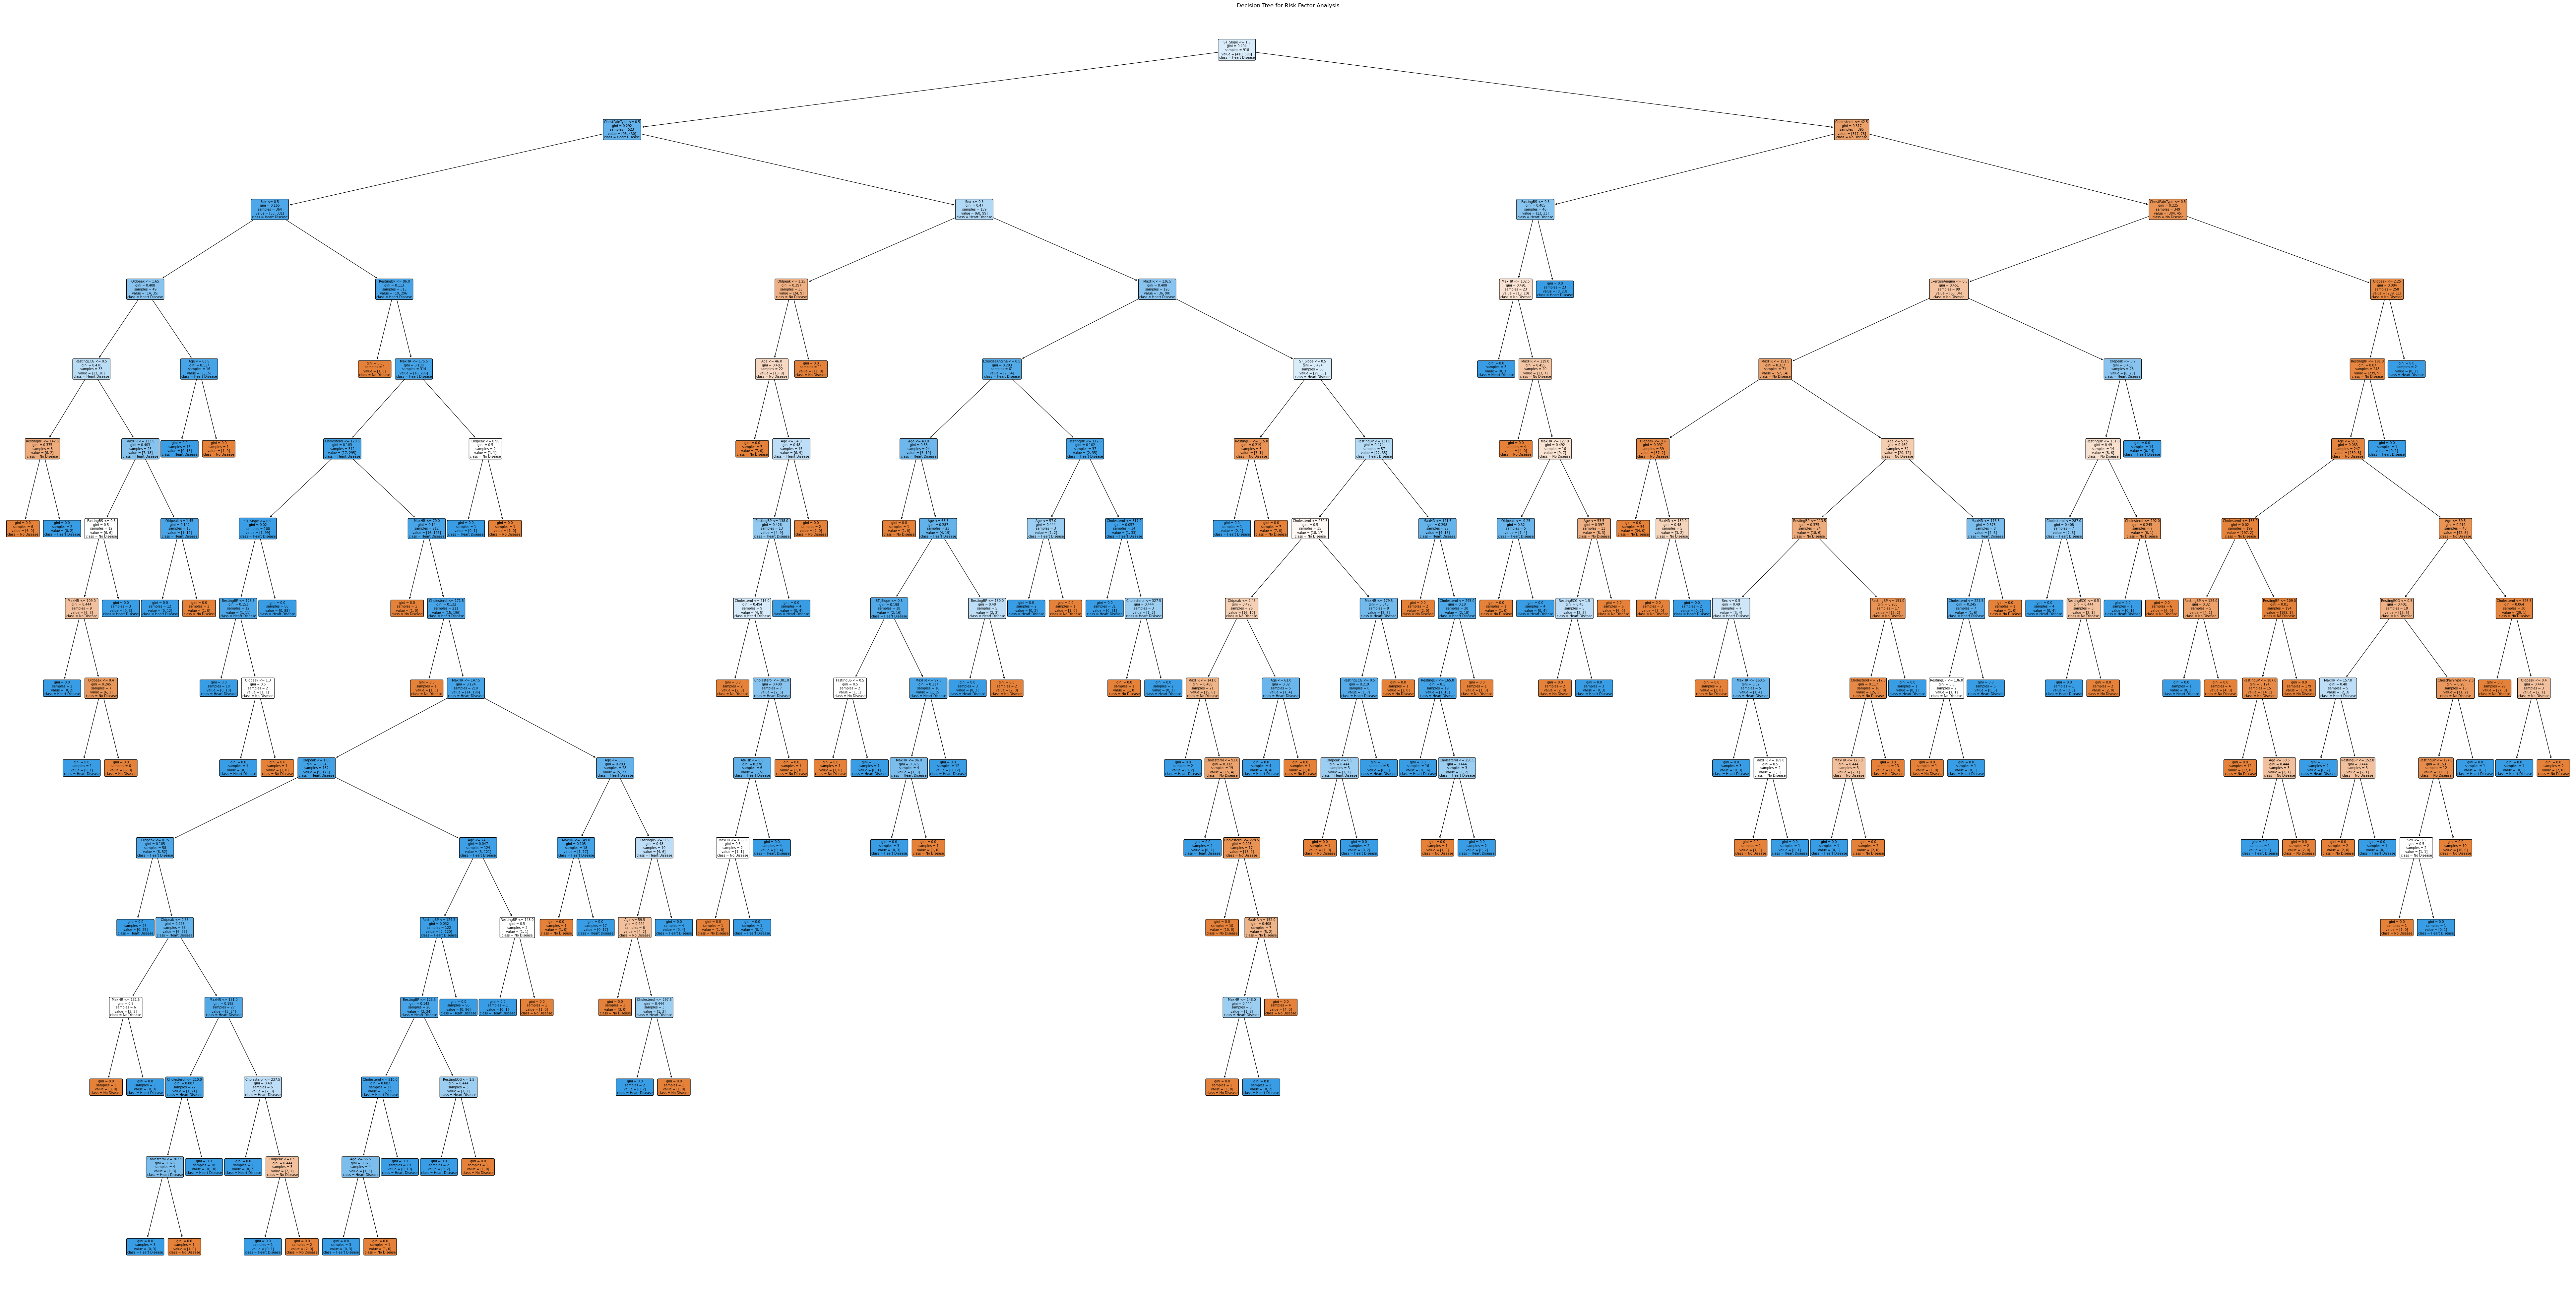

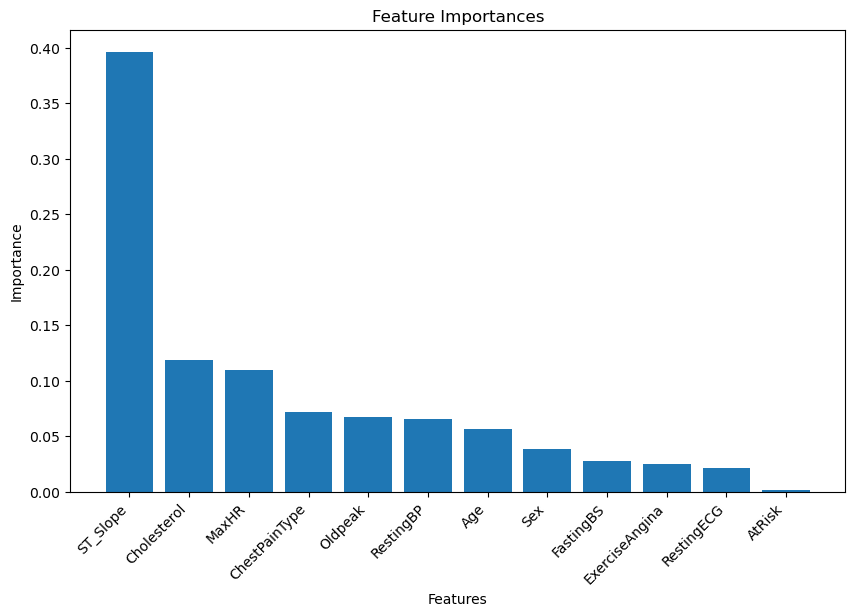

In [18]:
def risk_factor_analysis(data):
    data_numeric =preprocess_data(data)
    data_numeric = data_numeric.dropna(subset=['HeartDisease'])
    X = data_numeric.drop('HeartDisease', axis=1)
    y = data_numeric['HeartDisease']
    if len(data_numeric) > 0:
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X, y)
        #fitting x and y to draw a decision tree
        plt.figure(figsize=(100, 50))
        plot_tree(model, feature_names=list(X.columns), class_names=['No Disease', 'Heart Disease'], filled=True, rounded=True)
        plt.title('Decision Tree for Risk Factor Analysis')
        plt.show()
        #calculating feature importance and visualizing results
        feature_importances = pandas.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(feature_importances['Feature'], feature_importances['Importance'])
        plt.title('Feature Importances')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=45, ha='right')
        plt.show()
risk_factor_analysis(heart_df)

## Objective 2
### Explanation of Results

The correlation_analysis function may reveal insights into the relationships between different features and the target variable 'HeartDisease'. By calculating correlation coefficients and sorting them, we can possibly identify which features might be most positively or negatively correlated with heart disease. The subsequent visualization of the correlation matrix can provide a clearer picture of these relationships.
Additionally, the statistical significance testing for the correlation between 'ExerciseAngina' and 'HeartDisease' can help determine whether this correlation is likely to be a meaningful indicator. The Pearson correlation coefficient and p-value for 'ExerciseAngina' and 'HeartDisease' may offer insights into the strength and likelihood of their relationship. A low p-value (<0.05) might suggest that the correlation is statistically significant, adding credibility to the observed associatio

In summary, this analysis may provide valuable information about the potential influences of different features on heart disease, and the inclusion of statistical significance testing might enhance our confidence in the results. The 'ExerciseAngina' feature, in particular, appears to hold the highest positive correlation with heart disease risk, but further investigation is needed to establish the strength and reliability of this relationship.

### Visualisation

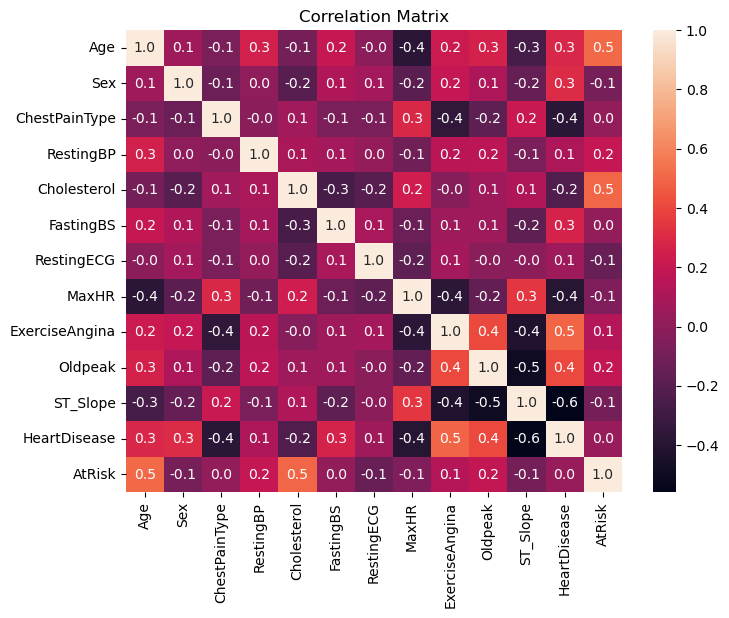

In [19]:
def visualize_correlation_matrix(data):
    correlation_matrix = data.corr()
    #displaying correlation matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True,fmt=".1f")
    plt.title('Correlation Matrix')
    plt.show()
visualize_correlation_matrix(heart_df)

## Objective 3
### Explanation of Results

Objective 3 is all about Patient Stratification focusing on 3 factors Age, Gender, and ExerciseAngina and Visualizing the derived data to get a overview of how HeartDisease is spread across Age, Gender and ExerciseAngina. The first part of the code starts with Age stratification in which the “age_bins” defines the age intervals and “age_labels” provides labels for these intervals. The intervals are 25-30, 31-40, 41-50, 51-60, 61-80, and 80+. Created bins and labels then applied to the “Age” column in the DataFrame. The data which is derived from “Age” and “HeartDisease” is then grouped into the newly created “Patient_Age” column. Then the collected data are organized within “HDisease_count_Age” and then the count is printed within each age group. The next part of the code is Gender stratification which has the same function as Age stratification. A new column in the Dataframe is created called “Patients_Gender”. The initial values for gender were 'M’ for male and 'F' for female respectively which were then replaced with numerical values as ‘0’ for 'M' and ‘1’ for 'F'. Then using 'groupby' data from “Sex” and “Heart Disease” are grouped and counted for the occurrence of each combination. The 'HDisease_count_gender' table displays the count of the Patients with and without heart disease for each gender category. In this part of the stratification, we use the same ‘replace’ method used prior in gender stratification into numerical values as '0' and '1' to replace 'N' and 'Y' which are No and Yes respective to patients who exercise with Angina. Then by using 'groupby' method data from “ExerciseAngina” and “Heart Disease” are grouped and assigned the series to “HDisease_count_exercise”. Then the count gets extracted and printed for different scenarios such as Patients who exercise and don't have heart disease ('exercise_yes_HD_no'), those who don't exercise and don't have heart disease ('exercise_no_HD_no'), Patients who exercise and have heart disease ('exercise_yes_HD_yes'), and those who don't exercise and have heart disease ('exercise_no_HD_yes'). Each of the Stratifications is visualized by displaying counts of Patients with and without heart disease within each category in a bar chart representation. This offers an overview of how heart disease is distributed across Age, Gender, and ExerciseAngina.

### Visualisation

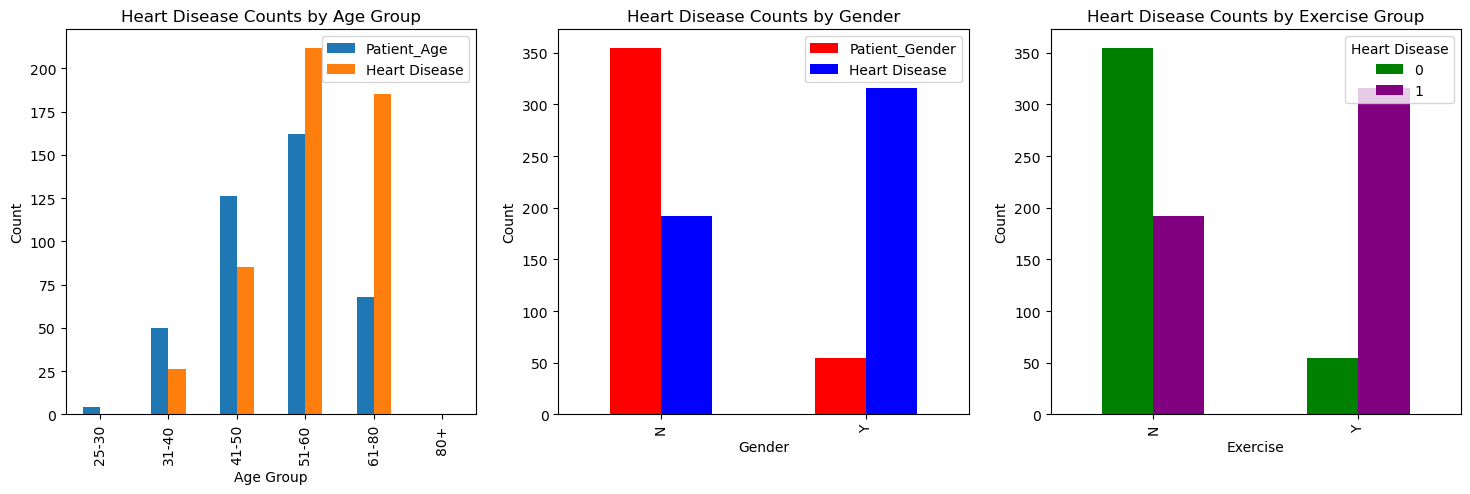

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('heart.csv')
fig, (axis_age, axis_gender, axis_exercise) = plt.subplots(1, 3, figsize=(18, 5))

# displaying age group plot;
HDisease_count_Age.plot(kind = 'bar', stacked = False, ax = axis_age)
axis_age.set_title('Heart Disease Counts by Age Group')
axis_age.set_xlabel('Age Group')
axis_age.set_ylabel('Count')
axis_age.legend(['Patient_Age', 'Heart Disease'], loc = 'upper right')

# displaying gender plot;
HDisease_count_gender.plot(kind = 'bar', stacked = False, color = ['red','blue'] , ax = axis_gender)
axis_gender.set_title('Heart Disease Counts by Gender')
axis_gender.set_xlabel('Gender')
axis_gender.set_ylabel('Count')
axis_gender.legend(['Patient_Gender', 'Heart Disease'], loc='upper right')

# displaying exercise plot;
HDisease_count_exercise.plot(kind =  'bar', stacked = False, color = ['green','purple'], ax = axis_exercise)
axis_exercise.set_title('Heart Disease Counts by Exercise Group')
axis_exercise.set_xlabel('Exercise')
axis_exercise.set_ylabel('Count')
axis_exercise.legend(title = 'Heart Disease', loc = 'upper right')
plt.show()

## Objective 4 
### Explanation of Results

Objective 4 is all about predicting whether individuals have high fasting blood sugar based on various other heart related features. Preprocessing of data set is done by excluding the categorical values 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina',and 'ST_Slope' and involving only numerical values.In order to predict the accuracy of fasting blood sugar random forest classifier is employed to learn patterns and accuracy by spliting the data in two sets:training and test data using train_test_split function respectively.Now Based on other columns Age, RestingBP, Cholesterol, MaxHR, Oldpeak, HeartDisease and by using  random forest model predictions are made on the test set, and the accuracy of these predictions is computed using the accuracy_score metric.The accuracy score indicates the model's effectiveness in predicting the presence of high fasting blood sugar.The model provided a commendable accuracy 76.1% on the test set,indicating the prediction level whether an individual has high fasting blood sugar in about three-quarters of the cases.Additionally,visualizations of decision trees within the random forest offers insights into the features.Here the loop iterated to 3 each time creating visualization for one decision tree. Each tree's structure and decision-making process are depicted,providing insights into how the ensemble of trees collectively contributes to making predictions in the Random Forest.

### Visualisation

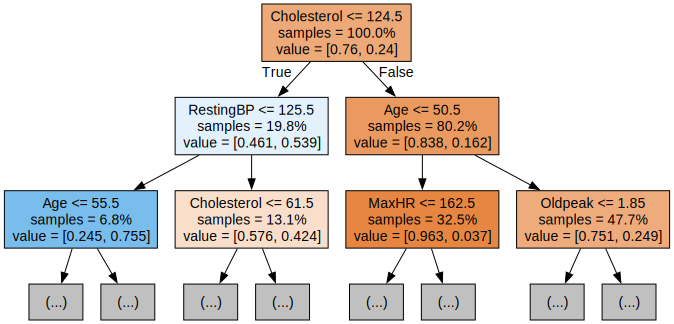

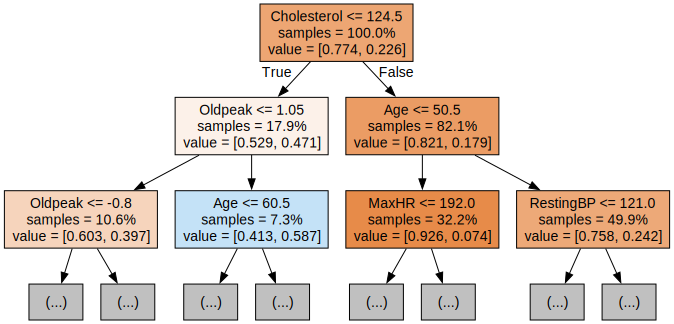

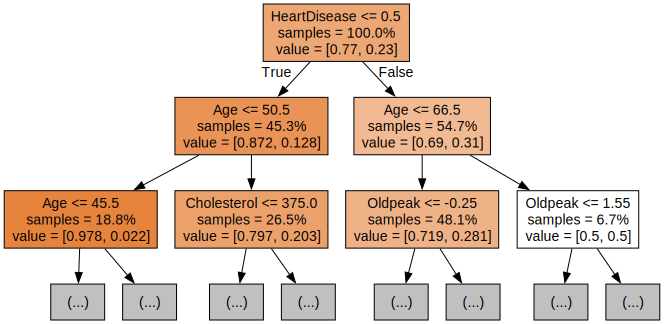

In [21]:
#displaying random forest tree as a graph

for i in range(3):
    tree = rf_acc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## Objective 5
### Explanation of Results

Objective 5 assess the predictive performance of three non-linear machine learning algorithms. Decision Tree, Random Forest, and Gradient Boosting in determining the likelihood of heart disease based on three specific features: "ExerciseAngina," "ST_Slope," and "Old_Peak," with "HeartDisease" as the target feature. The initial step involved preprocessing the dataset, encompassing both categorical and numerical data. After data preprocessing, the models were trained, and predictions were made to ascertain which algorithm exhibited superior accuracy. The evaluation of prediction results delved into precision scores and confusion matrices, shedding light on true positives, true negatives, false positives, and false negatives, offering valuable insights into the strengths and weaknesses of each model. Generating a classification model report containing precision scores, recall values, sensitivity, and F1 scores for both negative (class 0) and positive (class 1) outcomes. While accuracy, precision, and classification reports provided comprehensive information on model performance, additionally ROC curves and AUC values were explored. Offering an understanding of the balance between true positive and false positive rates. Examining the results, it is evident that all three models” Decision Tree”, ”Random Forest Tree”, ”Gradient Boosting” exhibited high precision scores around 85.56%, 85.87%, and 85.71%, and moderate accuracy values of approximately 76.63%, 77.72%, and 77.17%. The AUC values, ranging from 0.76 to 0.81respectively. Notably, the Gradient Boosting model excelled in scenarios prioritizing precision, with a higher precision score (0.857) and AUC value (0.84), making it suitable for applications where minimizing false positives is crucial. Conversely, the Random Forest model, with slightly higher accuracy (0.777) and comparable precision (0.859), emerged as a balanced choice, suitable for scenarios where overall accuracy is paramount without compromising precision excessively.

### Visualisation

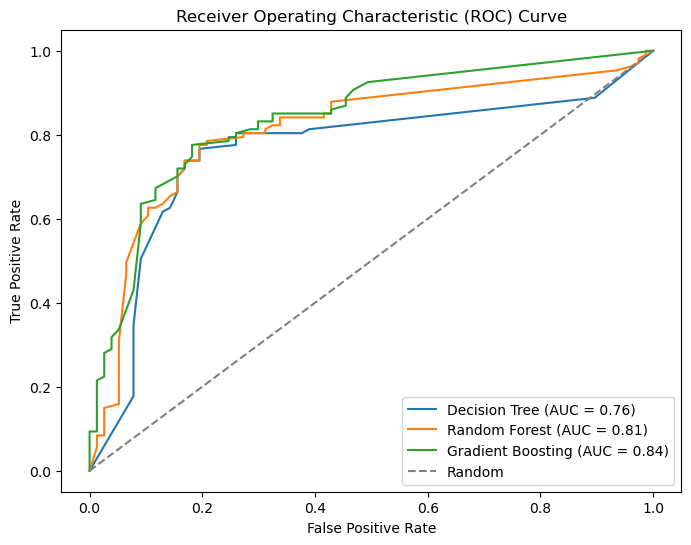

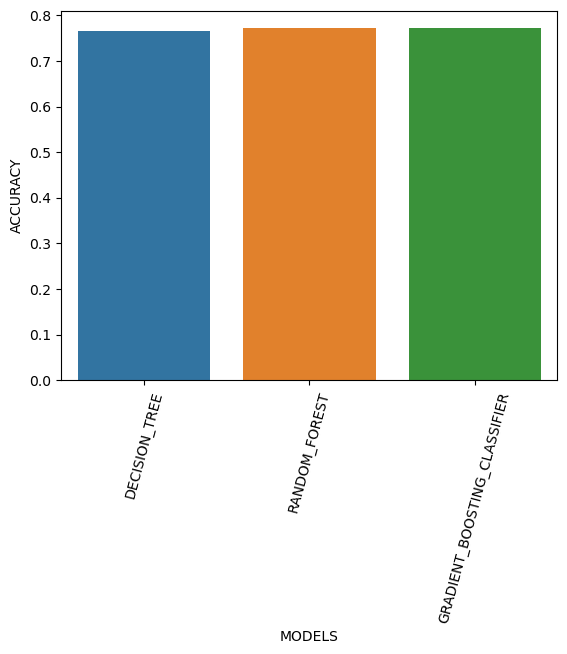

In [22]:
models = [dt, rf, gbc]
#assigning model_names variable to label model's in the ROC curve 
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
plt.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    y_prob = model.predict_proba(x_test)[:, 1] #To get predicted probabilities for the positive class
    fpr, tpr,thresholds = roc_curve(y_test, y_prob) # to Compute ROC curve 
    roc_auc = auc(fpr, tpr) #to compute AUC numeric value 
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random') #plotting a random classifier for reference
# virtually represent the plotted ROC curve 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#displaying comparative visualization
sns.barplot(x='MODELS',y='ACCURACY', data=accuracy_comparision_data ) 
plt.xticks(rotation=75) 
plt.show() 

# Conclusion 

### Achievements
The objectives achieved significant milestones in unraveling key insights from the heart disease dataset. Objective 1 successfully utilized a Decision Tree Classifier to pinpoint pivotal features like ST_Slope and Cholesterol, providing a comprehensive ranking of feature importances crucial for heart disease prediction. Objective 2's correlation analysis unveiled intricate relationships, particularly highlighting ExerciseAngina's substantial impact on HeartDisease. Objective 3's patient stratification by age, gender, and exercise revealed illuminating patterns in heart disease prevalence, offering valuable information on potential risk factors within specific demographic and lifestyle groups. Lastly, Objective 4 showcased the Random Forest model's commendable accuracy in predicting 'FastingBS,' with visualizations of decision trees offering nuanced interpretations. The combined achievements set a foundation for informed risk assessment and management strategies, encompassing feature importance, correlations, demographic insights, and predictive modeling accuracy for heart disease. Objective 5’s comparative analysis achieved finding the best algorithm for heat disease predictions.

### Limitations

There are some considerable limitations in the project. The findings may be specific to the dataset used and might not generalize well to different populations or diverse datasets. The dataset's temporal aspects are not considered. Trends or changes over time could impact the relevance of findings. Correlation analysis identifies relationships between variables, but it doesn't imply causation. Establishing causal links requires additional experimentation and research. The Decision Tree Classifier and Random Forest models are powerful but have limitations. They may not capture complex relationships or non-linear patterns effectively, potentially leading to oversimplification. Patient stratification simplifies the analysis but might oversimplify the complex interplay of multiple factors contributing to heart disease. Also, the analysis heavily depends on the quality of the dataset as the chosen dataset was clean with no missing values. Incomplete or inaccurate data may introduce biases and affect the reliability of results.

### Future Work

In future work we would like to obtain more diverse data and invest in data cleaning and validation processes to ensure high-quality data. Additionally, exploring larger and more diverse datasets can enhance the generalizability of results. Utilizing primary key and foreign key principles to retrieve specific patient records and analyse the purpose of their hospital visits contributes to the examination of outcomes and enhances predictive insights. Including more sophisticated machine learning models or ensemble methods that can capture intricate relationships and non-linear patterns, addressing the limitations of Decision Trees and Random Forest. Conduct more rigorous causal inference studies to establish true cause-and-effect relationships between variables, moving beyond correlation analysis.